# POKEMON PROJECT

In [305]:
import sqlite3

In [306]:
con=sqlite3.connect("C:\\Users\\user\\Downloads\\pokedex.sqlite")
cur=con.cursor()

In [307]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('conquest_move_displacements',),
 ('encounter_methods',),
 ('move_targets',),
 ('berry_firmness',),
 ('pokemon_move_methods',),
 ('conquest_warrior_stats',),
 ('item_flags',),
 ('item_fling_effects',),
 ('item_pockets',),
 ('move_damage_classes',),
 ('evolution_triggers',),
 ('contest_effects',),
 ('pokemon_habitats',),
 ('genders',),
 ('super_contest_effects',),
 ('conquest_move_ranges',),
 ('move_meta_categories',),
 ('egg_groups',),
 ('conquest_episodes',),
 ('contest_types',),
 ('move_flags',),
 ('conquest_warrior_archetypes',),
 ('conquest_stats',),
 ('encounter_conditions',),
 ('pokemon_colors',),
 ('move_battle_styles',),
 ('pal_park_areas',),
 ('move_effects',),
 ('regions',),
 ('conquest_move_effects',),
 ('growth_rates',),
 ('languages',),
 ('pokeathlon_stats',),
 ('conquest_warrior_skills',),
 ('pokemon_shapes',),
 ('move_meta_ailments',),
 ('stats',),
 ('conquest_warrior_skill_names',),
 ('conquest_move_displacement_prose',),
 ('pokemon_color_names',),
 ('encounter_condit

In [308]:
#Types
cur.execute("SELECT id,identifier FROM types; ")
cur.fetchall()

[(1, 'normal'),
 (2, 'fighting'),
 (3, 'flying'),
 (4, 'poison'),
 (5, 'ground'),
 (6, 'rock'),
 (7, 'bug'),
 (8, 'ghost'),
 (9, 'steel'),
 (10, 'fire'),
 (11, 'water'),
 (12, 'grass'),
 (13, 'electric'),
 (14, 'psychic'),
 (15, 'ice'),
 (16, 'dragon'),
 (17, 'dark'),
 (10001, 'unknown'),
 (10002, 'shadow')]

In [309]:
# GEN 1 Moves:
moves='''SELECT M.IDENTIFIER,t.name
            from moves m
             INNER JOIN 
              type_names t ON m.type_id=t.type_id
              WHERE t.local_language_id=5
              AND 
              M.GENERATION_ID=1;'''
cur.execute(moves)
cur.fetchall()

[('pound', 'Normal'),
 ('karate-chop', 'Combat'),
 ('doubleslap', 'Normal'),
 ('comet-punch', 'Normal'),
 ('mega-punch', 'Normal'),
 ('pay-day', 'Normal'),
 ('fire-punch', 'Feu'),
 ('ice-punch', 'Glace'),
 ('thunderpunch', 'Electrik'),
 ('scratch', 'Normal'),
 ('vicegrip', 'Normal'),
 ('guillotine', 'Normal'),
 ('razor-wind', 'Normal'),
 ('swords-dance', 'Normal'),
 ('cut', 'Normal'),
 ('gust', 'Vol'),
 ('wing-attack', 'Vol'),
 ('whirlwind', 'Normal'),
 ('fly', 'Vol'),
 ('bind', 'Normal'),
 ('slam', 'Normal'),
 ('vine-whip', 'Plante'),
 ('stomp', 'Normal'),
 ('double-kick', 'Combat'),
 ('mega-kick', 'Normal'),
 ('jump-kick', 'Combat'),
 ('rolling-kick', 'Combat'),
 ('sand-attack', 'Sol'),
 ('headbutt', 'Normal'),
 ('horn-attack', 'Normal'),
 ('fury-attack', 'Normal'),
 ('horn-drill', 'Normal'),
 ('tackle', 'Normal'),
 ('body-slam', 'Normal'),
 ('wrap', 'Normal'),
 ('take-down', 'Normal'),
 ('thrash', 'Normal'),
 ('double-edge', 'Normal'),
 ('tail-whip', 'Normal'),
 ('poison-sting', 'Po

In [310]:
# Use "for loops" to read each table in the DB and store it as a df with the same name as the table.
#You should see a set of Pandas df like this :
pk={}
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

for name in cur.fetchall():
    pk[name[0]+'_df']=pd.read_sql_query("SELECT * from {};".format(name[0]),con)
    
for name in pk.keys():
    print(name)

conquest_move_displacements_df
encounter_methods_df
move_targets_df
berry_firmness_df
pokemon_move_methods_df
conquest_warrior_stats_df
item_flags_df
item_fling_effects_df
item_pockets_df
move_damage_classes_df
evolution_triggers_df
contest_effects_df
pokemon_habitats_df
genders_df
super_contest_effects_df
conquest_move_ranges_df
move_meta_categories_df
egg_groups_df
conquest_episodes_df
contest_types_df
move_flags_df
conquest_warrior_archetypes_df
conquest_stats_df
encounter_conditions_df
pokemon_colors_df
move_battle_styles_df
pal_park_areas_df
move_effects_df
regions_df
conquest_move_effects_df
growth_rates_df
languages_df
pokeathlon_stats_df
conquest_warrior_skills_df
pokemon_shapes_df
move_meta_ailments_df
stats_df
conquest_warrior_skill_names_df
conquest_move_displacement_prose_df
pokemon_color_names_df
encounter_condition_prose_df
item_fling_effect_prose_df
pokedexes_df
evolution_trigger_prose_df
experience_df
berry_firmness_names_df
move_meta_ailment_names_df
move_effect_prose_

# back to Pandas, some data exploration :

In [311]:
import pandas as pd

In [312]:
df=pd.read_csv('C:\\Users\\user\\Downloads\\pokemon.csv')

In [313]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [314]:
#Let's rename the # column to id, and convert all column labels to lower case.
df.rename(columns={'#':'id'},inplace=True)
df.columns=map(str.lower,df.columns)
df.head()



,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [315]:
df.duplicated('id',keep=False)

0      False
1      False
2       True
3       True
4      False
5      False
6       True
7       True
8       True
9      False
10     False
11      True
12      True
13     False
14     False
15     False
16     False
17     False
18      True
19      True
20     False
21     False
22      True
23      True
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
770    False
771    False
772    False
773    False
774    False
775    False
776    False
777    False
778    False
779    False
780     True
781     True
782     True
783     True
784     True
785     True
786     True
787     True
788    False
789    False
790    False
791    False
792    False
793    False
794    False
795     True
796     True
797     True
798     True
799    False
Length: 800, dtype: bool

In [316]:
df.drop_duplicates(subset='id',inplace=True)
df.shape

(721, 13)

In [317]:
import numpy as np
df['type 2']

0      Poison
1      Poison
2      Poison
4         NaN
5         NaN
6      Flying
9         NaN
10        NaN
11        NaN
13        NaN
14        NaN
15     Flying
16     Poison
17     Poison
18     Poison
20     Flying
21     Flying
22     Flying
24        NaN
25        NaN
26     Flying
27     Flying
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
        ...  
762       NaN
763       NaN
764    Normal
765    Normal
766    Dragon
767    Dragon
768       Ice
769       Ice
770       NaN
771    Flying
772     Fairy
773     Fairy
774       NaN
775       NaN
776       NaN
777     Fairy
778     Grass
779     Grass
780     Grass
784     Grass
788       NaN
789       NaN
790    Dragon
791    Dragon
792       NaN
793    Flying
794    Ground
795     Fairy
797     Ghost
799     Water
Name: type 2, Length: 721, dtype: object

In [318]:
# fill nan values

In [319]:
df.fillna('none',inplace=True)

In [320]:
# create pokedex with these columns: ['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']


pokedex=df[['id','name','type 1','type 2','generation','legendary']]
pokedex.head()



,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,none,1,False
5,5,Charmeleon,Fire,none,1,False


In [321]:
# create poke_statistics with these columns:['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']
poke_statistics=df[['id','hp','attack','defense','sp. atk','sp. def','speed','total']]
poke_statistics.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405


In [322]:
poke_statistics.describe()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,417.945908
std,208.27906,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,109.663671
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000
25%,181.00000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,320.000000
50%,361.00000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,424.000000
75%,541.00000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,499.000000
max,721.00000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,720.000000


In [323]:
pokedex.groupby(['generation']).describe()

id                                                       
            count   mean        std    min     25%    50%     75%    max
generation                                                              
1           151.0   76.0  43.734045    1.0   38.50   76.0  113.50  151.0
2           100.0  201.5  29.011492  152.0  176.75  201.5  226.25  251.0
3           135.0  319.0  39.115214  252.0  285.50  319.0  352.50  386.0
4           107.0  440.0  31.032241  387.0  413.50  440.0  466.50  493.0
5           156.0  571.5  45.177428  494.0  532.75  571.5  610.25  649.0
6            72.0  685.5  20.928450  650.0  667.75  685.5  703.25  721.0

# Generation and id

In [324]:
import matplotlib 

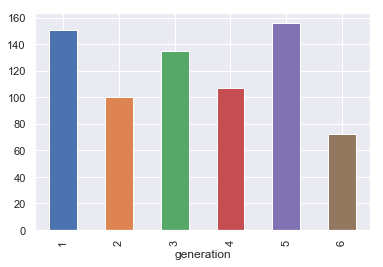

In [325]:
generation_count=pokedex.groupby('generation')['id'].count()
generation_count.plot(kind='bar')

                                 

# Generation and noi of pokemon

In [326]:
# Try Seaborn 
import seaborn as sb


C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


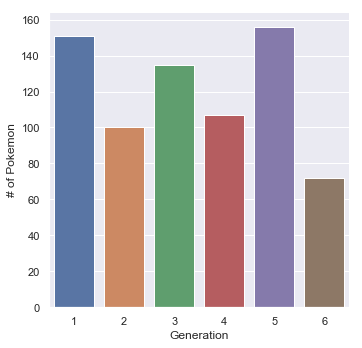

In [327]:
sb.factorplot(kind='count',data=pokedex, x='generation').set_axis_labels("Generation","# of Pokemon")

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


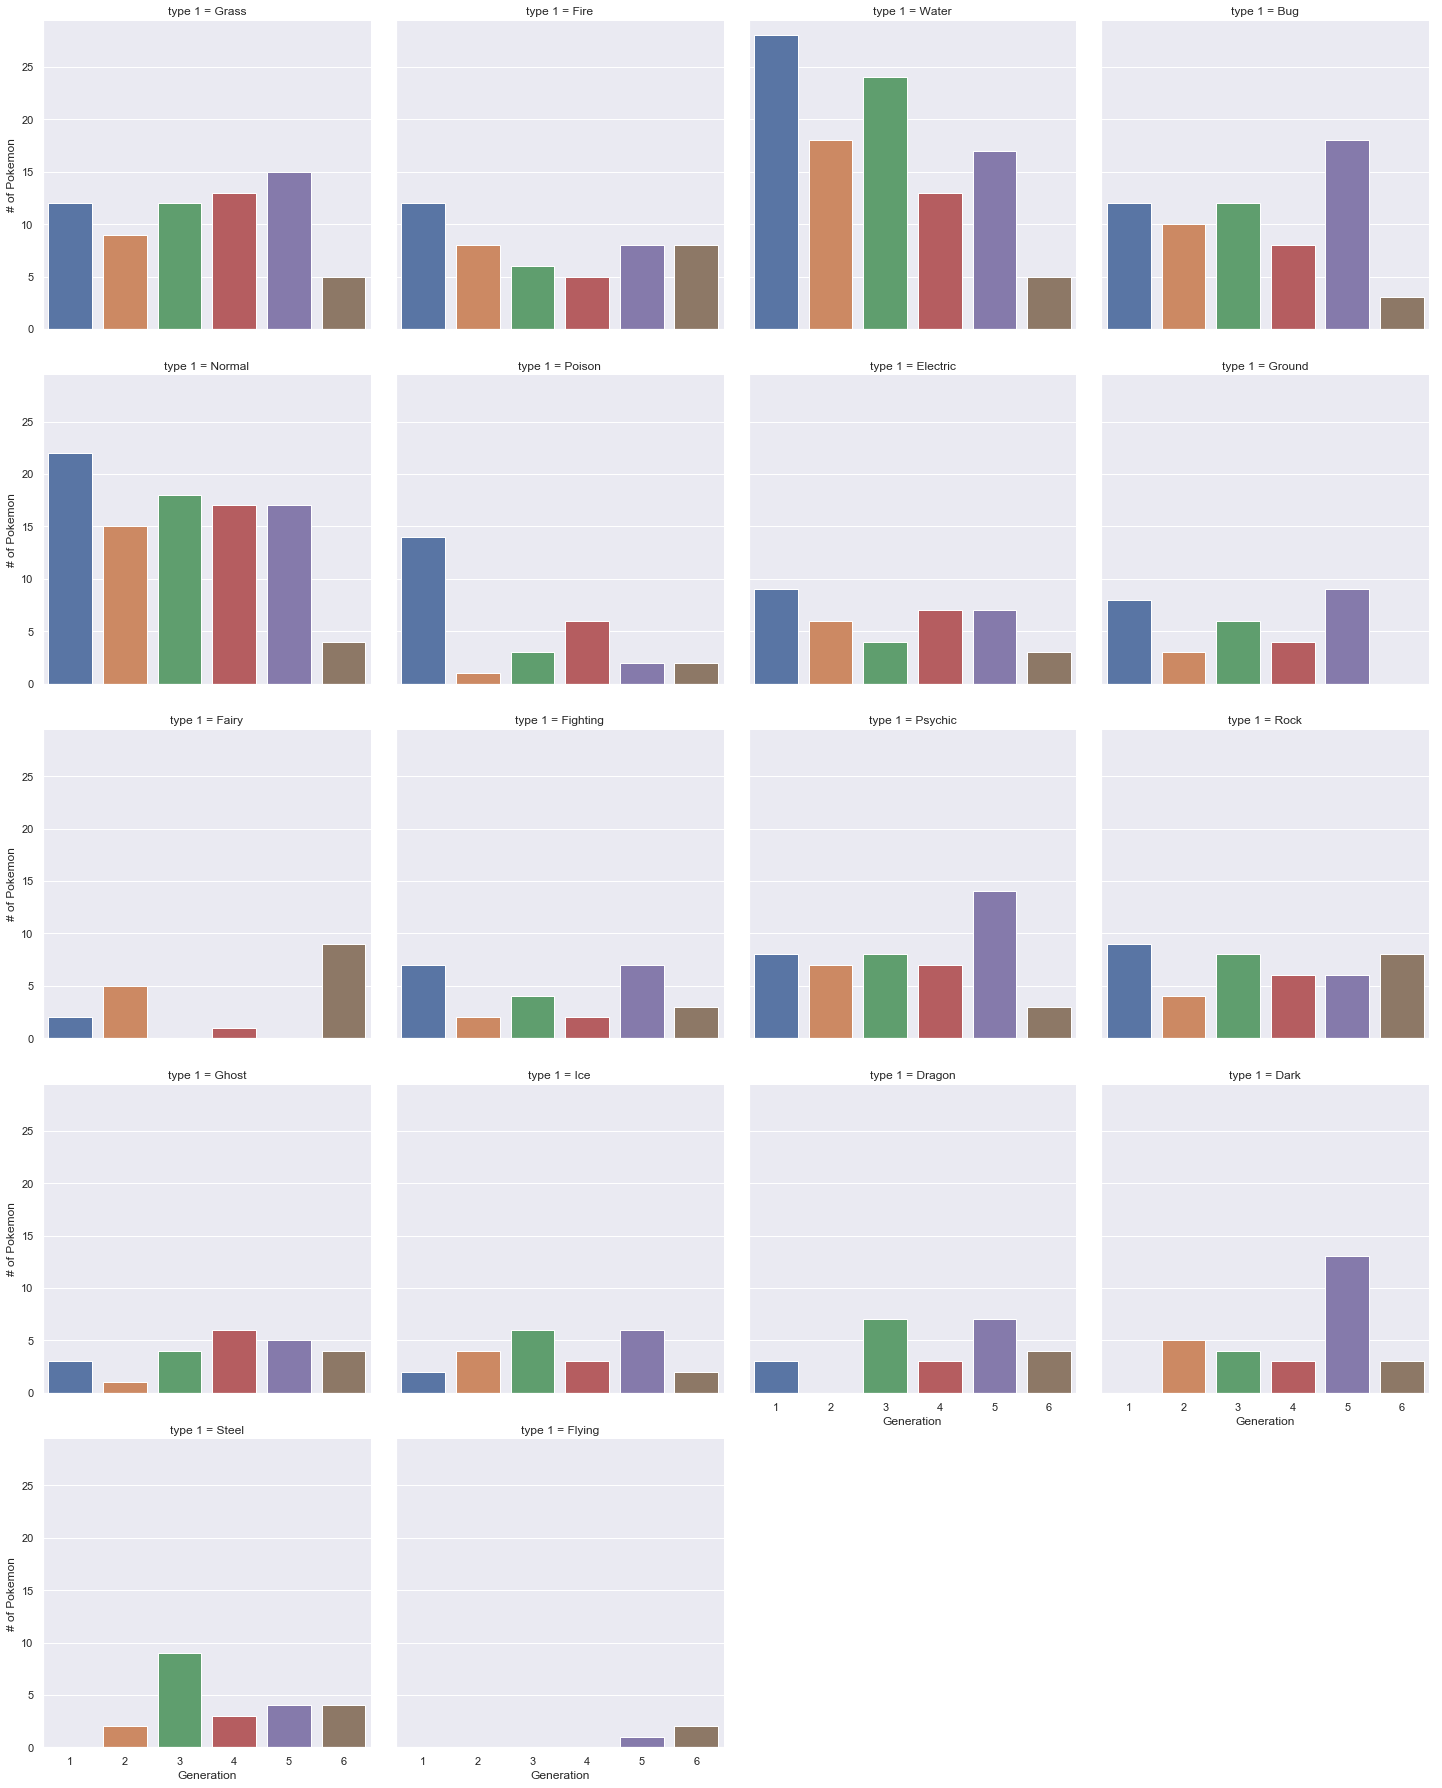

In [328]:
sb.factorplot(kind='count',data=pokedex,col='type 1',col_wrap=4,x='generation').set_axis_labels("Generation","# of Pokemon")

In [329]:
# Summarize: The individual graph shows the number of pokemon in every typein  type 1 pokemon accross six generation.The first/
#/ graph shows noi of  pokemon 'grass' in type 1 across all 6 generations.


# ARE THERE UNIQUE PRIMARY OR SECONDARY POKEMON TYPES

In [330]:
import numpy as np
np.setdiff1d

<function numpy.lib.arraysetops.setdiff1d(ar1, ar2, assume_unique=False)>

In [331]:
obj_df=df.select_dtypes(include=['object']).copy()
obj_df.head()

,name,type 1,type 2
0,Bulbasaur,Grass,Poison
1,Ivysaur,Grass,Poison
2,Venusaur,Grass,Poison
4,Charmander,Fire,none
5,Charmeleon,Fire,none


In [332]:
unique_types=pokedex.dropna()
unique_types.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,none,1,False
5,5,Charmeleon,Fire,none,1,False


In [333]:
unique_type1=np.setdiff1d(unique_types['type 1'],unique_types['type 2'])
unique_type1

array([], dtype=object)

In [334]:
### There are no unique primary or secondary types

# Get The total number of primary and secondary types:

In [335]:
A=df['type 1'].nunique()
print('no of type1 pokemon:',A )

no of type1 pokemon: 18


In [336]:
A=df['type 2'].nunique()
print('no of type2 pokemon:',A )

no of type2 pokemon: 19


# What are the most common types of Pokemon?

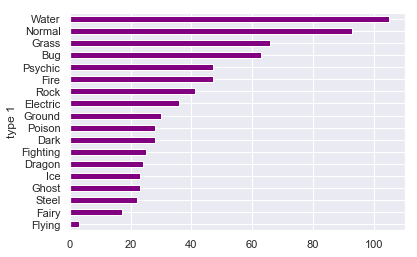

In [337]:
type1_pokemon=pokedex.groupby('type 1')['id'].count()
type1_pokemon_sort=type1_pokemon.sort_values()
type1_pokemon_sort.plot(kind='barh',color='purple')


In [338]:
# According the above graph the most common type of pokemon in type 1 is water and next is normal and least type is flying.

# Seaborn Plot

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


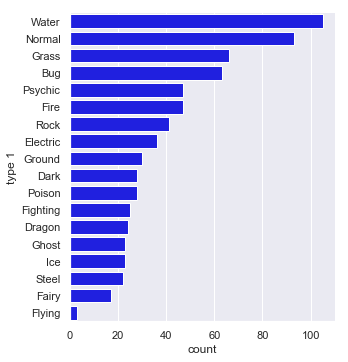

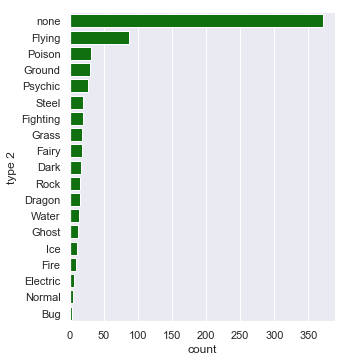

In [339]:
sb.factorplot(data=pokedex,
               y='type 1',
                kind='count',
                 order = pokedex['type 1'].value_counts().index,
                 color='blue',
                     aspect=1)

sb.factorplot(data=pokedex,
               y='type 2',
                kind='count',
                 order = pokedex['type 2'].value_counts().index,
                 color='green',
                     aspect=1)

In [340]:
# BLUE GRAPH: From the blue graph it is evident that pokemon water is the most common type in type 1 pokemon and flying is the least 
/# opted pokemon in type 1
# GREEN GRAPH:FRom the green graph it is evident that pokemon flying is most common type in type 2 and bug is the least opted 
/# in type 2.
#BOTH GRAPH: Comparing both the graph it is evident that all types of pokemon in type 1 is more used that type2.


# But we can not say which type maps into which type

In [341]:
# Create a new df called "dual_types"
dual_types=df[['id','name','type 1','type 2','generation','legendary']]
dual_types.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,none,1,False
5,5,Charmeleon,Fire,none,1,False


In [342]:
I=dual_types.index
I

Int64Index([  0,   1,   2,   4,   5,   6,   9,  10,  11,  13,
            ...
            788, 789, 790, 791, 792, 793, 794, 795, 797, 799],
           dtype='int64', length=721)

In [343]:
D=dual_types.dtypes
D

id             int64
name          object
type 1        object
type 2        object
generation     int64
legendary       bool
dtype: object

In [344]:
C=dual_types.columns
C

Index(['id', 'name', 'type 1', 'type 2', 'generation', 'legendary'], dtype='object')

In [345]:
# Get a grid of values from 'type 1' 'type 2' 
A=df['type 1'].nunique()
B=df['type 2'].nunique()
A,B

(18, 19)

In [346]:
#plotting by using Matplotlib color map
dual_types1=dual_types.groupby(['type 1','type 2']).size().unstack()
dual_types1

type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,none
type 1,,,,,,,,,,,,,,,,,,,
Bug,NaN,NaN,NaN,2.0,NaN,1.0,2.0,13.0,1.0,6.0,1.0,NaN,NaN,11.0,NaN,3.0,5.0,1.0,17.0
Dark,NaN,NaN,3.0,NaN,NaN,2.0,2.0,5.0,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN,9.0
Dragon,NaN,NaN,NaN,1.0,NaN,NaN,1.0,4.0,NaN,NaN,4.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,11.0
Electric,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,26.0
Fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
Fighting,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,20.0
Fire,NaN,NaN,NaN,NaN,NaN,6.0,NaN,5.0,NaN,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,28.0
Flying,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Ghost,NaN,1.0,1.0,NaN,NaN,NaN,3.0,2.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,9.0


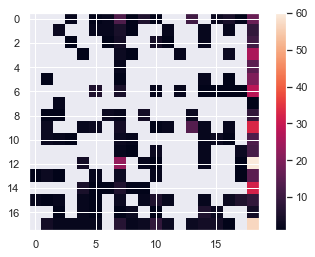

In [347]:
plt.imshow(dual_types1)
plt.colorbar();

In [348]:
# plt with seaborn

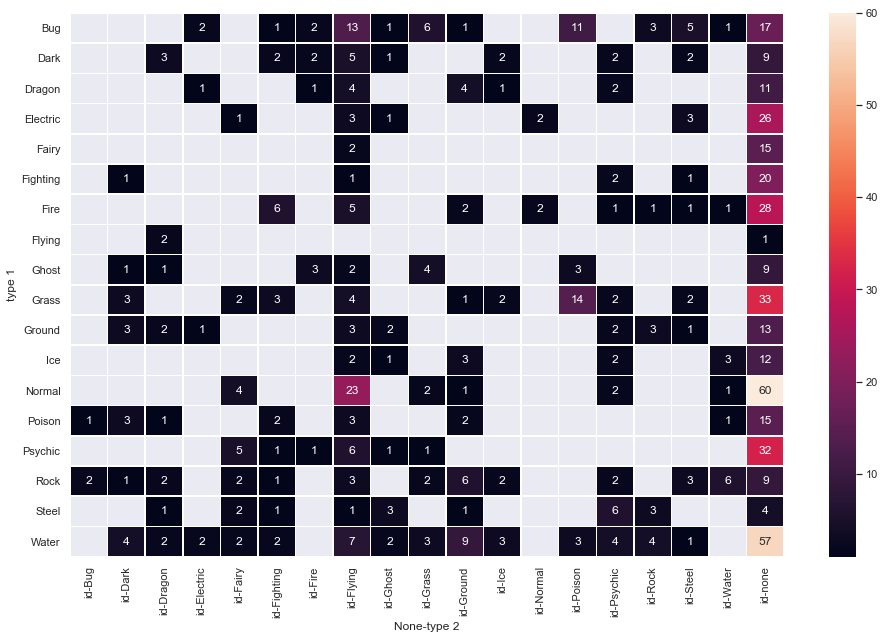

In [349]:
plt.figure(figsize=(16,10))
result=dual_types.pivot_table(index=['type 1'],columns=['type 2'],values=['id'],aggfunc='count')
sb.heatmap(result,annot=True,linewidths=.5,fmt='g')

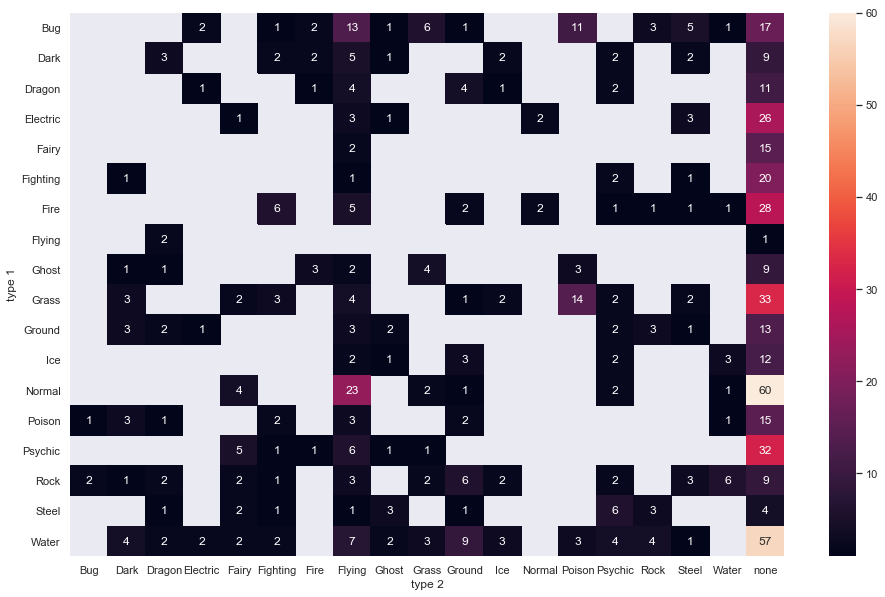

In [350]:
plt.figure(figsize=(16,10))
sb.heatmap(dual_types1,annot=True,)

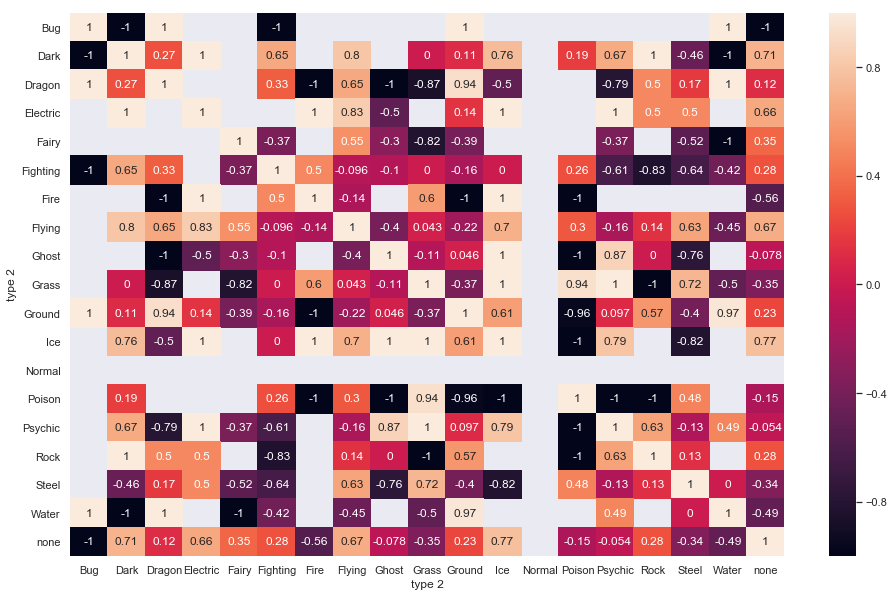

In [351]:
plt.figure(figsize=(16,10))
Dual_Corr=dual_types1.corr()
sb.heatmap(Dual_Corr,annot=True);


In [352]:
#Summarize: the above graph shows the correlation of type 1 and type 2 pokemon.Positive values indicate there is a 
# relationship existing between two type 1 and type 2 pokemon. Negative values indicate inverse relationship between type 1
# type 2 pokemon. 

# Are any of the statistics correlated?


In [369]:
poke_statistics.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405


In [370]:
pokedex.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,none,1,False
5,5,Charmeleon,Fire,none,1,False


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

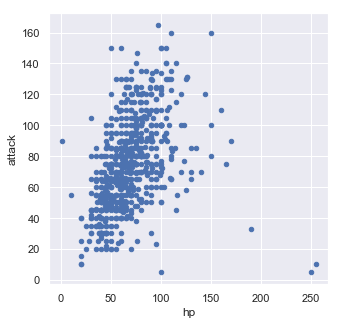

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

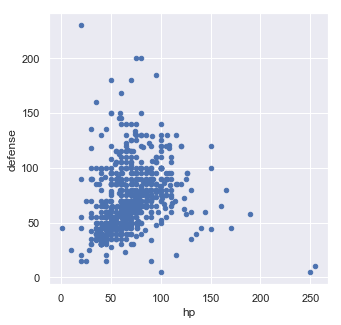

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

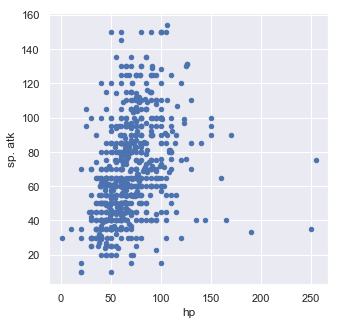

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

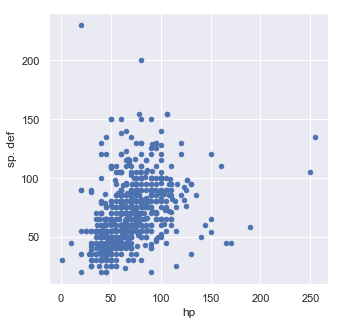

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

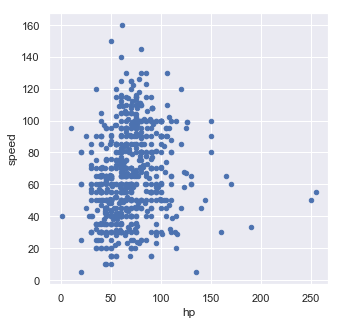

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

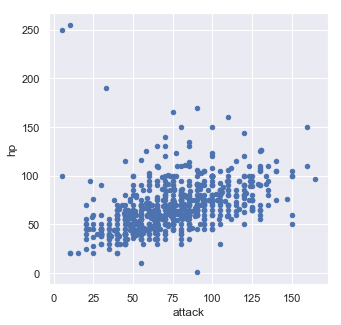

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

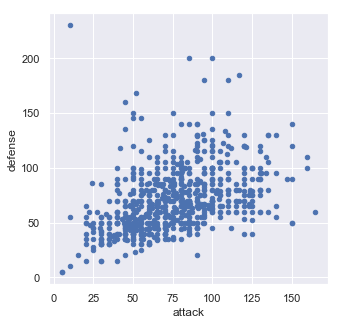

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

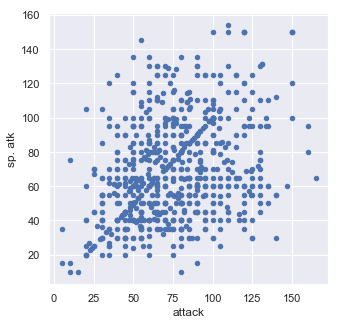

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

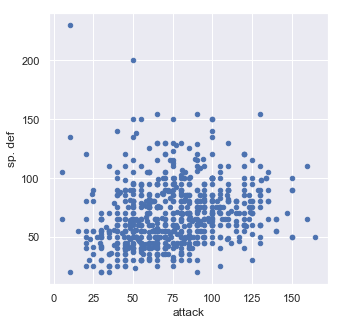

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

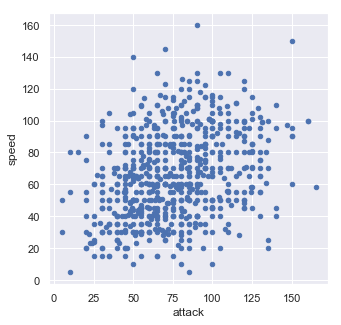

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

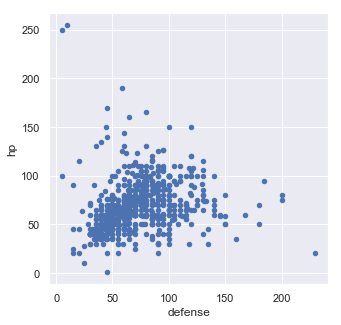

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

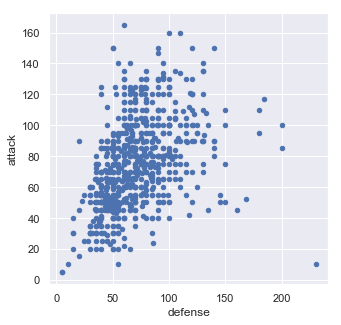

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

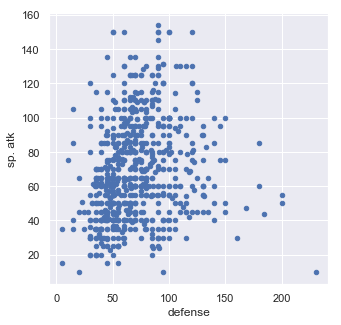

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

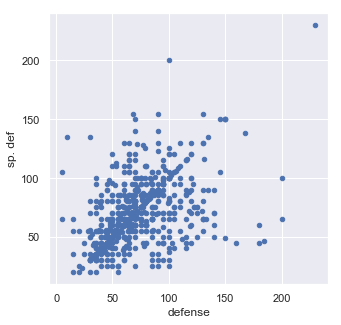

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

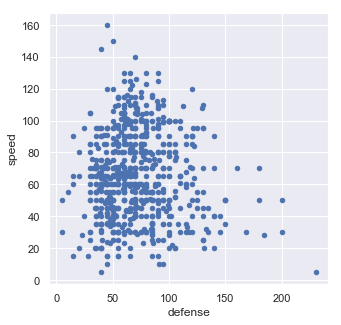

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

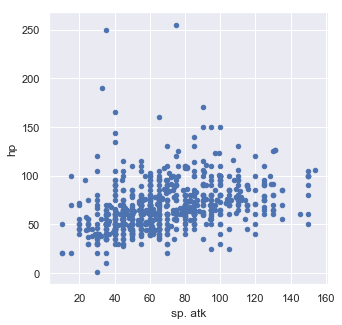

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

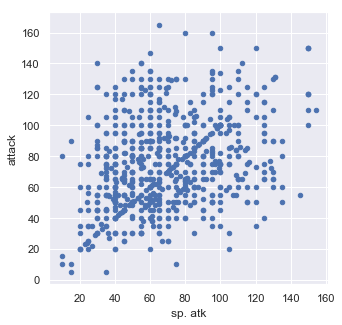

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

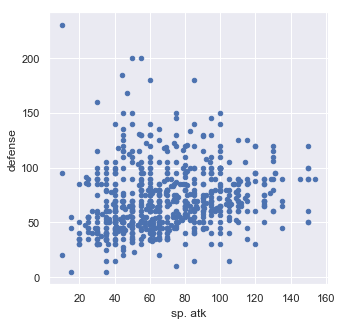

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

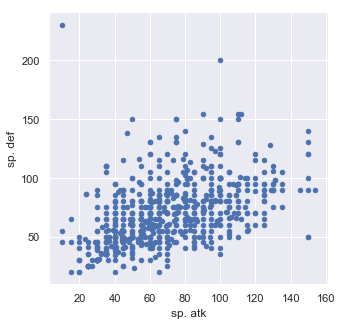

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

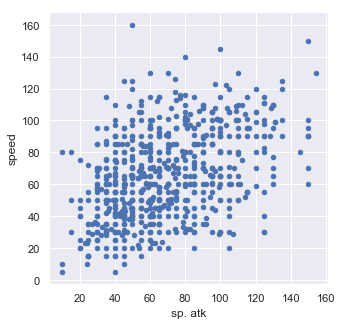

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

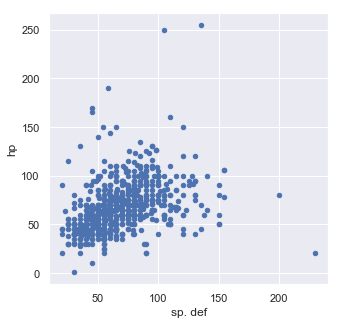

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

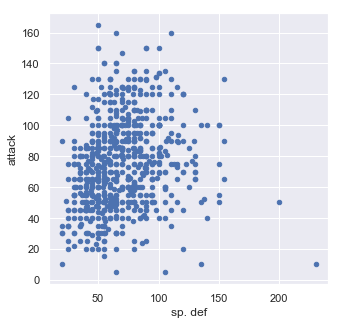

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

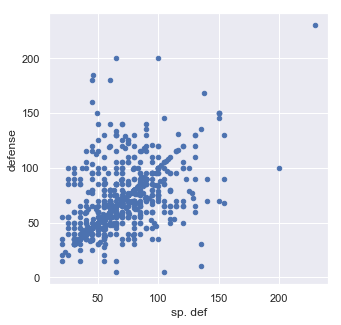

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

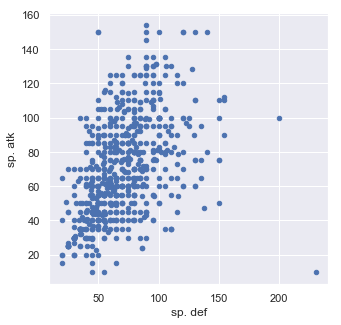

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

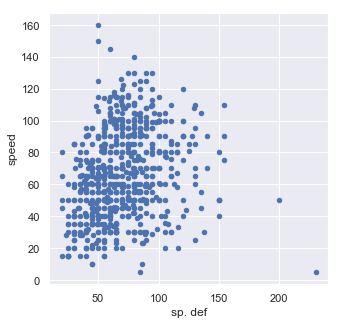

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

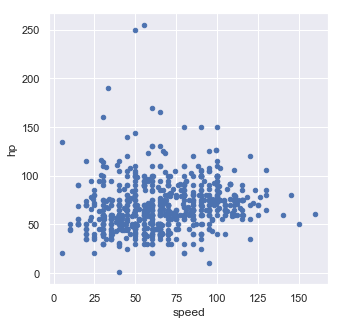

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

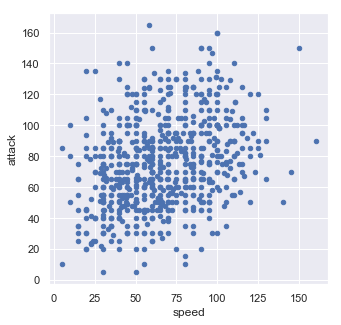

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

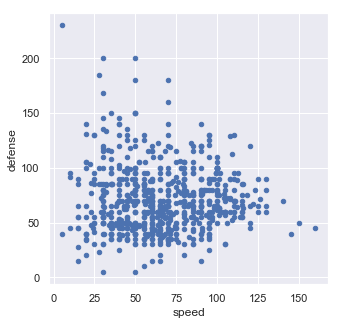

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

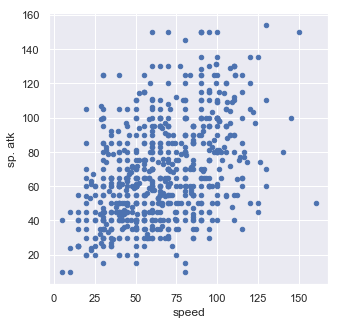

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

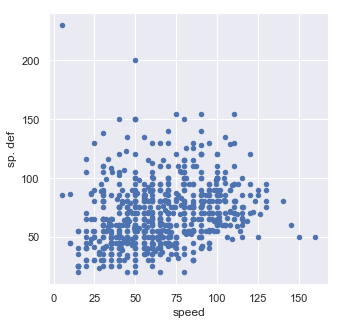

In [373]:
a=[0,1,2,3,4,5]
x_axis=['hp','attack','defense','sp. atk','sp. def','speed']
y_axis=['hp','attack','defense','sp. atk','sp. def','speed']
for i in a:
    for j in a:
        if j!=i:
            plt.figure();
            poke_statistics.plot.scatter(x= x_axis[i],y=y_axis[j],figsize=(5, 5));
            plt.show();

In [374]:
from scipy import stats


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


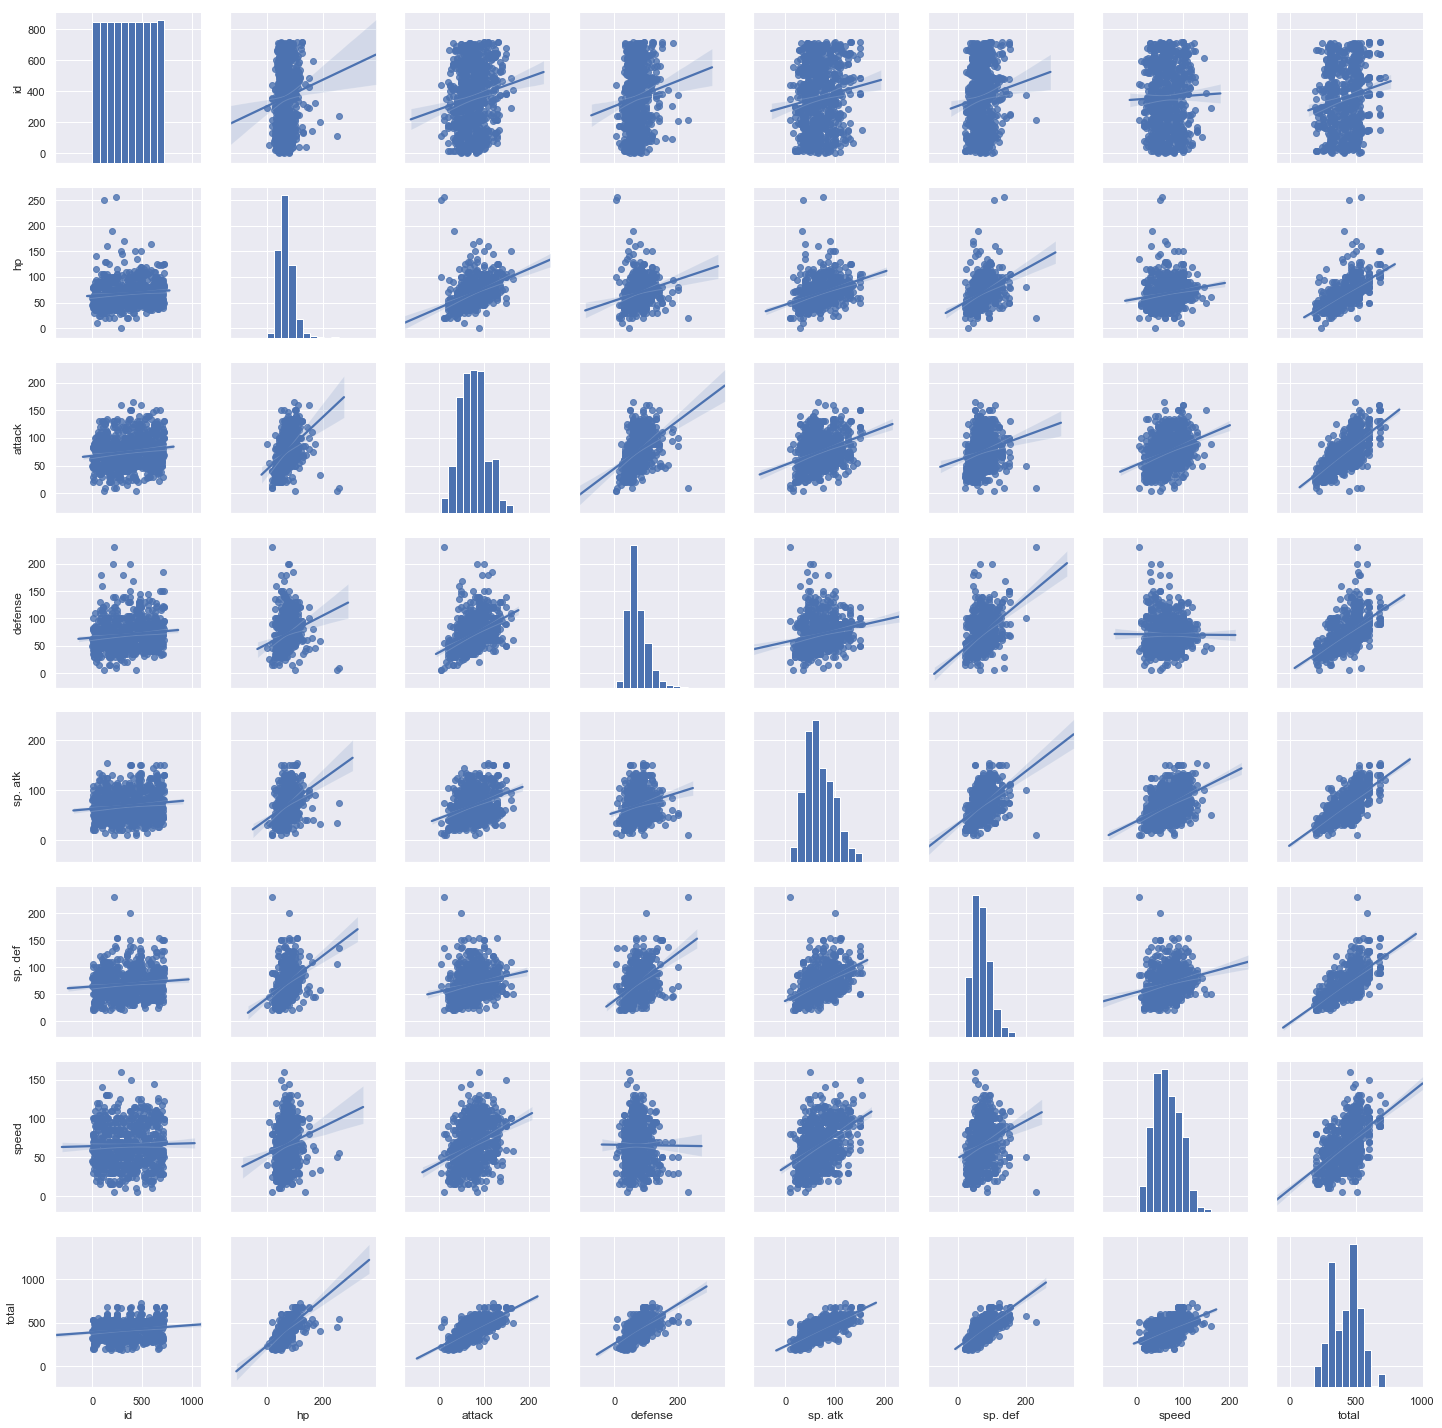

In [375]:
sb.pairplot(poke_statistics,kind='reg');
plt.show();

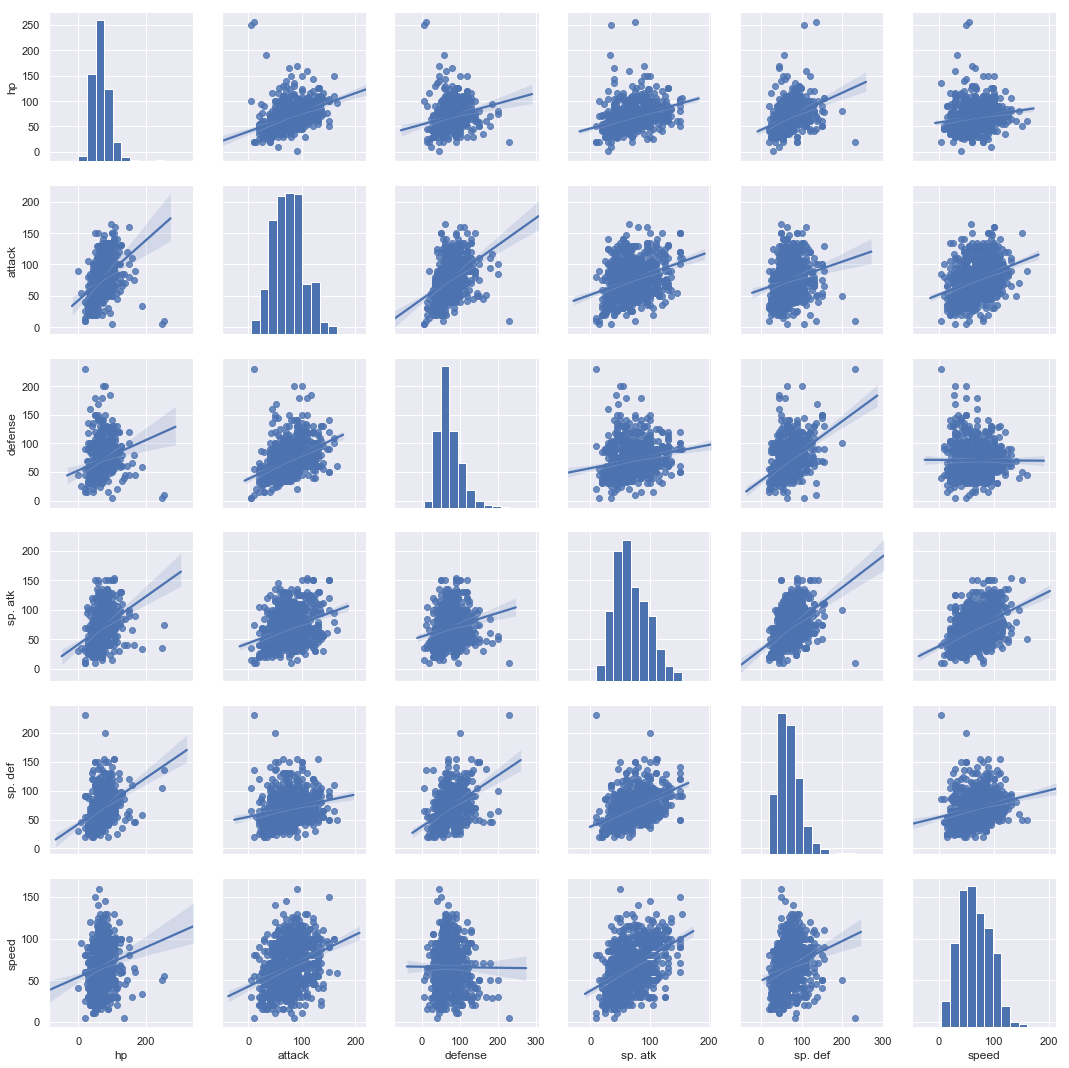

In [376]:
sb.pairplot(poke_statistics.iloc[:,1:7],kind='reg')
plt.show();

In [ ]:
# The above graph shows correlation between various characters(varioables) of pokemon with each other.

# What are the strongest and weakest Pokemon species?

In [354]:

poke_statistics.loc[[poke_statistics['total'].idxmax()]]

,id,hp,attack,defense,sp. atk,sp. def,speed,total
552,493,120,120,120,120,120,120,720


In [355]:
# pokemon with "id"=493 is the strongest

In [356]:
poke_statistics.loc[[poke_statistics['total'].idxmin()]]

,id,hp,attack,defense,sp. atk,sp. def,speed,total
206,191,30,30,30,30,30,30,180


In [357]:
# pokemon with "id"=191 is the weakest

In [358]:
# Instead, try a different metric: standardize the six statistic columns independently by converting each. 
#value into a z-score so when we do take the sum, we account for the variation in the each statistic using. 
#Its mean and standard deviation across all Pokemon species.

In [359]:
from scipy.stats import zscore
z_scores_df = df.copy()
z_scores_df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,none,405,58,64,58,80,65,80,1,False


# Define a new column, strength, as the sum of the z-scores of each statistic—the higher this value, the stronger the Pokemon.


In [360]:
z_scores_df.drop(['id','name','type 1','type 2','total','generation','legendary'],axis =1,\
                 inplace = True)
z_scores_df.head()

,hp,attack,defense,sp. atk,sp. def,speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
4,39,52,43,60,50,65
5,58,64,58,80,65,80


In [361]:
z_scores_df = z_scores_df.apply(zscore)
z_scores_df['strength'] = z_scores_df.sum(axis = 1, skipna = True) 
z_scores_df.head()

,hp,attack,defense,sp. atk,sp. def,speed,strength
0,-0.905138,-0.899300,-0.743715,-0.133276,-0.155513,-0.759906,-3.596849
1,-0.324426,-0.451799,-0.263847,0.386141,0.402508,-0.209629,-0.461052
2,0.449857,0.236666,0.421679,1.078696,1.146536,0.524073,3.857508
4,-1.137423,-0.796031,-0.949372,-0.306415,-0.713534,-0.026204,-3.928979
5,-0.401854,-0.382952,-0.435228,0.386141,-0.155513,0.524073,-0.465334


In [362]:
z_scores_df = z_scores_df.assign(name=df['name'].values, type_1 = df['type 1'].values,\
                                type_2 = df['type 2'].values )
z_scores_df.head()

,hp,attack,defense,sp. atk,sp. def,speed,strength,name,type_1,type_2
0,-0.905138,-0.899300,-0.743715,-0.133276,-0.155513,-0.759906,-3.596849,Bulbasaur,Grass,Poison
1,-0.324426,-0.451799,-0.263847,0.386141,0.402508,-0.209629,-0.461052,Ivysaur,Grass,Poison
2,0.449857,0.236666,0.421679,1.078696,1.146536,0.524073,3.857508,Venusaur,Grass,Poison
4,-1.137423,-0.796031,-0.949372,-0.306415,-0.713534,-0.026204,-3.928979,Charmander,Fire,none
5,-0.401854,-0.382952,-0.435228,0.386141,-0.155513,0.524073,-0.465334,Charmeleon,Fire,none


In [364]:
z_scores_df = z_scores_df[['name','type_1','type_2','strength']]
z_scores_df.head()

,name,type_1,type_2,strength
0,Bulbasaur,Grass,Poison,-3.596849
1,Ivysaur,Grass,Poison,-0.461052
2,Venusaur,Grass,Poison,3.857508
4,Charmander,Fire,none,-3.928979
5,Charmeleon,Fire,none,-0.465334


# Repeat the heatmap you created but now for the new strength metric you computed

In [367]:
heatmap= z_scores_df.groupby(['type_1','type_2'])['strength'].mean().unstack(fill_value=0)

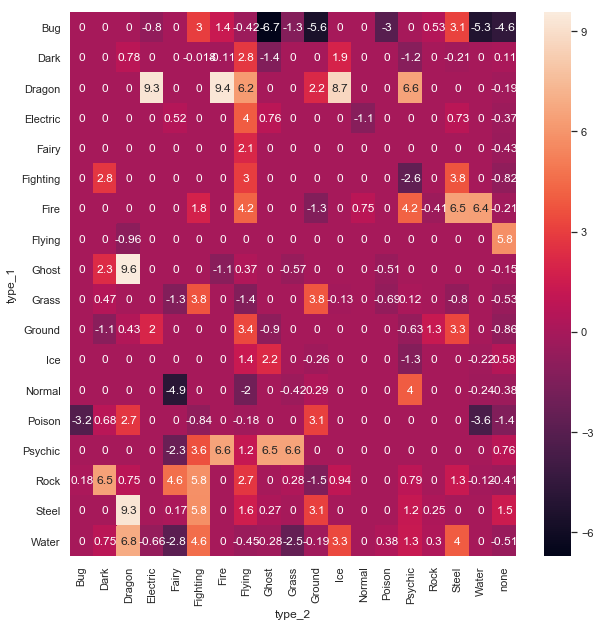

In [368]:
f,ax=plt.subplots(figsize=(10,10))
sb.heatmap(heatmap,annot=True,ax=ax)

In [377]:
# Conclusion: zscore is the measure of how many standard deviation below or above the popolation mean a raw score is.
#The above map shows the stength of different types of pokemon with the stadard deviation value.
# The strength of pokemon increase as the colour fades or as colour cools. 